In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'

In [2]:
df = pd.read_csv('../Data/hysteresis/attachments/hys_kjh.csv')

In [3]:
df.head(3)

,Unnamed: 0,e,f
0,1,0.000000,0.000000
1,2,0.000000,0.015758
2,3,0.000234,0.030466


<Axes: >

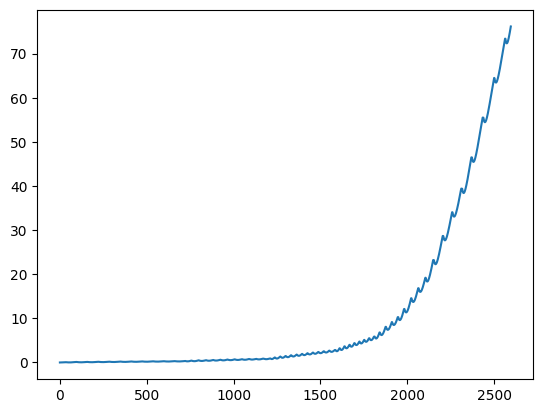

In [4]:
df.e.plot()

<Axes: >

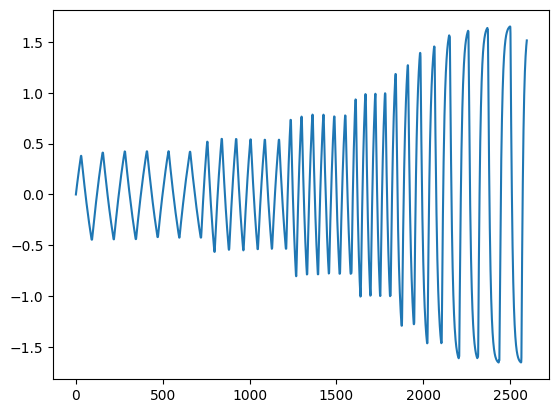

In [5]:
df.f.plot()

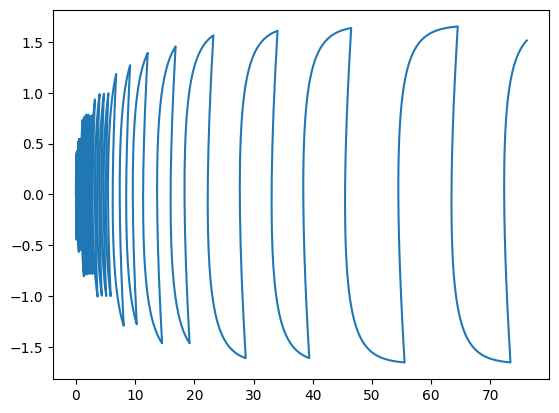

In [6]:
plt.plot(df.iloc[:,1], df.iloc[:,2])

In [7]:
df = df.iloc[:,1:]

<Axes: >

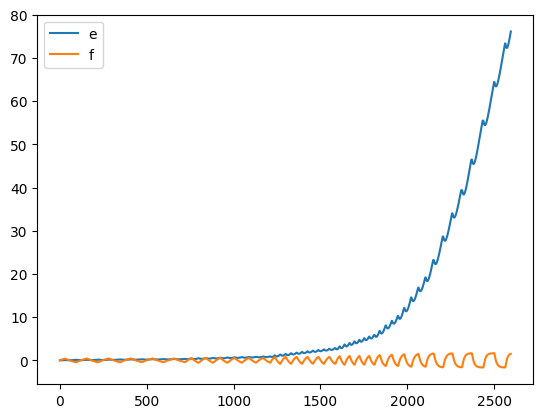

In [8]:
df.plot()

In [9]:
#hysteresis curve equation
def hys_curve(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f


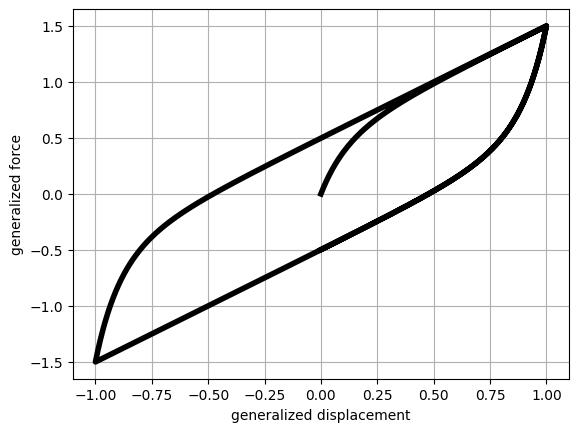

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# APPLIED DISPLACEMENT TIME HISTORY
dt = 0.001
t = np.arange(0, 1.5 + dt, dt)
a0 = 1
fr = 1
u = a0 * np.sin(2 * np.pi * fr * t[:len(t)])
v = 2 * np.pi * fr * a0 * np.cos(2 * np.pi * fr * t[:len(t)])
n = len(u)

# 1. INITIAL SETTINGS
# 1.1 Set the five model parameters
ka = 10.0
kb = 1.0
alfa = 10.0
beta1 = 0.0
beta2 = 0.0

# 1.2 Compute the internal model parameters
u0 = 0.5 * (((ka - kb) / 1e-20) ** (1 / alfa) - 1)
f0 = ((ka - kb) / 2) * (((1 + 2 * u0) ** (1 - alfa) - 1) / (1 - alfa))

# 1.3 Initialize the generalized force vector
f = np.zeros(n)

# 2. CALCULATIONS AT EACH TIME STEP
for i in range(1, n):
    # 2.1 Update the history variable
    uj = u[i - 1] + np.sign(v[i]) * (1 + 2 * u0) - np.sign(v[i]) * (((np.sign(v[i]) * (1 - alfa)) / (ka - kb)) * (f[i - 1] - beta1 * u[i - 1] ** 3 - beta2 * u[i - 1] ** 5 - kb * u[i - 1] - np.sign(v[i]) * f0 + (ka - kb) * (((1 + 2 * u0) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa))))) ** (1 / (1 - alfa))

    # 2.2 Evaluate the generalized force at time t
    if (np.sign(v[i]) * uj) - 2 * u0 < np.sign(v[i]) * u[i] or np.sign(v[i]) * u[i] < np.sign(v[i]) * uj:
        f[i] = beta1 * u[i] ** 3 + beta2 * u[i] ** 5 + kb * u[i] + (ka - kb) * ((((1 + 2 * u0 + np.sign(v[i]) * (u[i] - uj)) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa))) - (((1 + 2 * u0) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa)))) + np.sign(v[i]) * f0
    else:
        f[i] = beta1 * u[i] ** 3 + beta2 * u[i] ** 5 + kb * u[i] + np.sign(v[i]) * f0

# PLOT
plt.figure()
plt.plot(u, f, 'k', linewidth=4)
plt.xlabel('generalized displacement')
plt.ylabel('generalized force')
plt.grid()
plt.show()


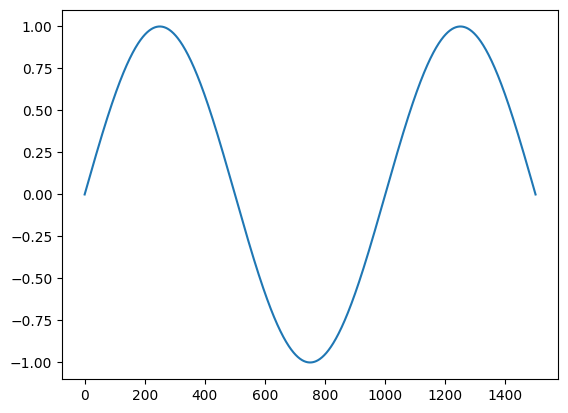

In [11]:
plt.plot(u)

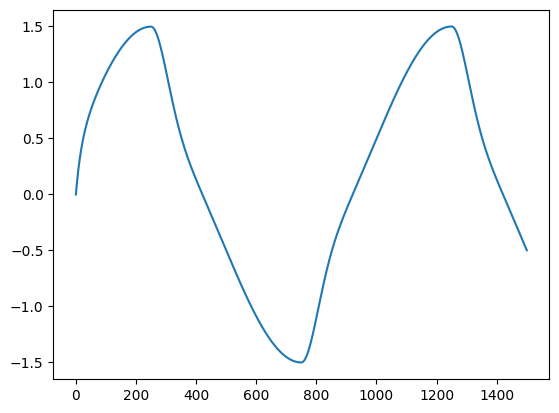

In [12]:
plt.plot(f)

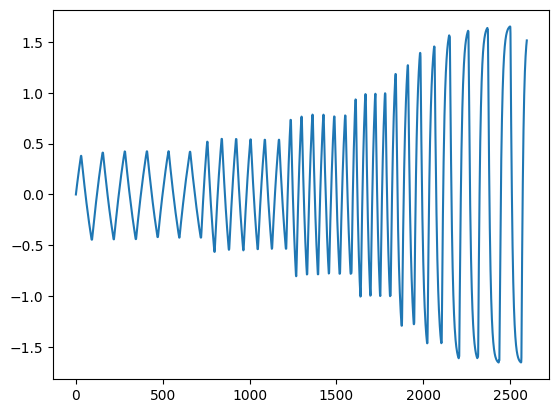

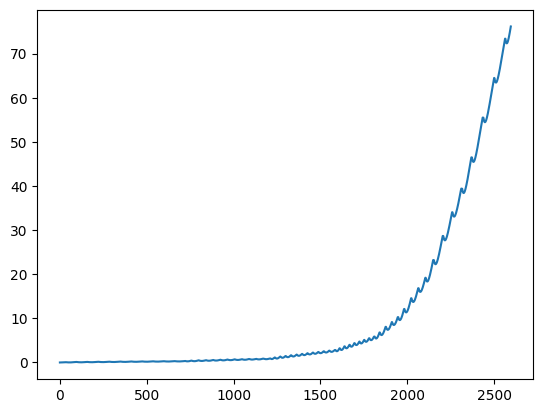

In [13]:
plt.plot(df.iloc[:,1])
plt.show()
plt.plot(df.iloc[:,0])
plt.show()

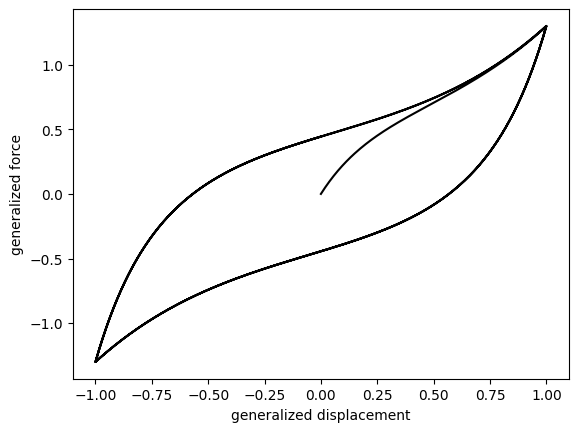

In [14]:
# APPLIED DISPLACEMENT TIME HISTORY
dt = 0.001
t = np.arange(0, 3 + dt, dt)
a0 = 1
fr = 1
u = a0 * np.sin(2 * np.pi * fr * t[:len(t)])
v = 2 * np.pi * fr * a0 * np.cos(2 * np.pi * fr * t[:len(t)])
n = len(u)

# INITIAL SETTINGS
# Set the four model parameters
ka = 5.0
kb = 0.5
alfa = 5.0
beta = 1.0
# Compute the internal model parameters
u0 = -(1 / (2 * alfa)) * np.log(10 ** -20 / (ka - kb))
f0 = ((ka - kb) / (2 * alfa)) * (1 - np.exp(-2 * alfa * u0))
# Initialize the generalized force vector
f = np.zeros(n)

# CALCULATIONS AT EACH TIME STEP
for i in range(1, n):
    # Update the history variable
    uj = u[i-1] + 2*u0*np.sign(v[i]) + np.sign(v[i])*(1/alfa)*np.log(np.abs(np.sign(v[i])*(alfa/(ka-kb))*(-2*beta*u[i-1]+np.exp(beta*u[i-1])-np.exp(-beta*u[i-1])+kb*u[i-1]+np.sign(v[i])*((ka-kb)/alfa)*np.exp(-2*alfa*u0)+np.sign(v[i])*f0-f[i-1])))
    # Evaluate the generalized force at time t
    if (np.sign(v[i])*uj-2*u0 < np.sign(v[i])*u[i]) or (np.sign(v[i])*u[i] < np.sign(v[i])*uj):
        f[i] = -2*beta*u[i] + np.exp(beta*u[i]) - np.exp(-beta*u[i]) + kb*u[i] - np.sign(v[i])*((ka-kb)/alfa)*(np.exp(-alfa*(np.sign(v[i])*(u[i]-uj)+2*u0))-np.exp(-2*alfa*u0)) + np.sign(v[i])*f0
    else:
        f[i] = -2*beta*u[i] + np.exp(beta*u[i]) - np.exp(-beta*u[i]) + kb*u[i] + np.sign(v[i])*f0

# PLOT
plt.figure()
plt.plot(u, f, 'k')
plt.xlabel('generalized displacement')
plt.ylabel('generalized force')
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [153]:
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from keras import optimizers

In [64]:
total = pd.DataFrame()

In [65]:
total['u'] = u
total['time'] = t
total['f'] = f


In [66]:
total

,u,time,f
0,0.000000e+00,0.000,0.000000
1,6.283144e-03,0.001,0.017059
2,1.256604e-02,0.002,0.033687
3,1.884844e-02,0.003,0.049898
4,2.513010e-02,0.004,0.065705
...,...,...,...
2996,-2.513010e-02,2.996,0.430554
2997,-1.884844e-02,2.997,0.433910
2998,-1.256604e-02,2.998,0.437259
2999,-6.283144e-03,2.999,0.440601


In [109]:
x = total.iloc[:,0:2]
y = total.f

In [119]:
x_tf = tf.convert_to_tensor(x.values)
y_tf = tf.convert_to_tensor(y)

In [131]:
x_tr = x_tf[:2000]
x_te = x_tf[2000:]
y_tr = y_tf[:2000]
y_te = y_tf[2000:]

----
## LSTM

In [174]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(2, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1))

In [175]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 2, 64)             16896     
                                                                 
 lstm_34 (LSTM)              (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [177]:
adam = optimizers.Adam(lr=0.01)

In [178]:
model.compile(loss = 'mse', optimizer = adam, metrics = 'mse')

In [179]:
history = model.fit(x_tr, y_tr, epochs = 500)

Epoch 1/500
63/63 [==============================] - 4s 2ms/step - loss: 0.1826 - mse: 0.1826
Epoch 2/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1283 - mse: 0.1283
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 4/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 6/500
63/63 [==============================] - 0s 2ms/step - loss: 0.1040 - mse: 0.1040
Epoch 7/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1027 - mse: 0.1027
Epoch 8/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1044 - mse: 0.1044
Epoch 9/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1032 - mse: 0.1032
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1006 - mse: 0.1006
Epoch 11/500
63/63 [==============================] - 0s 3m

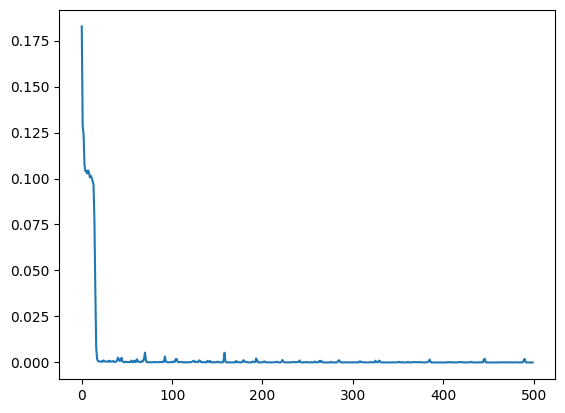

In [180]:
plt.plot(history.history['loss'])

In [181]:
pred = model.predict(x_te)

32/32 [==============================] - 1s 1ms/step


In [182]:
pred = pred.reshape(-1,1)

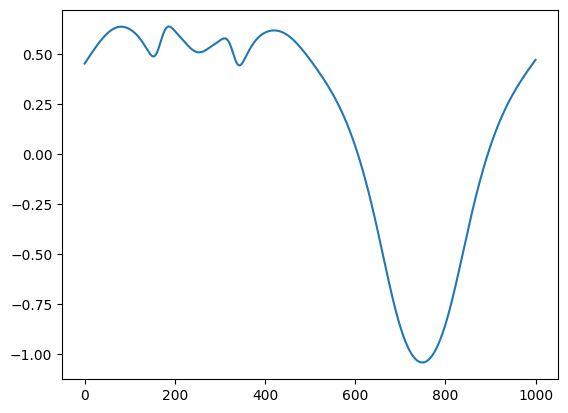

In [183]:
plt.plot(pred)

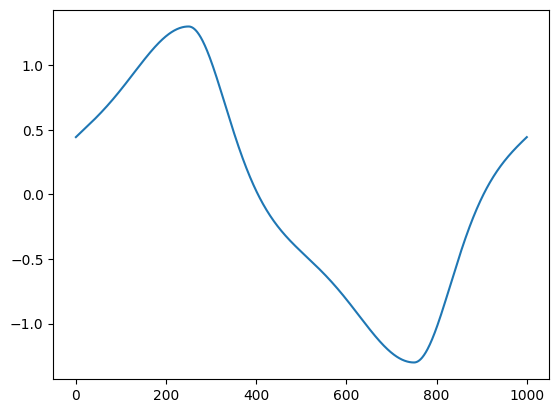

In [184]:
plt.plot(y_te)

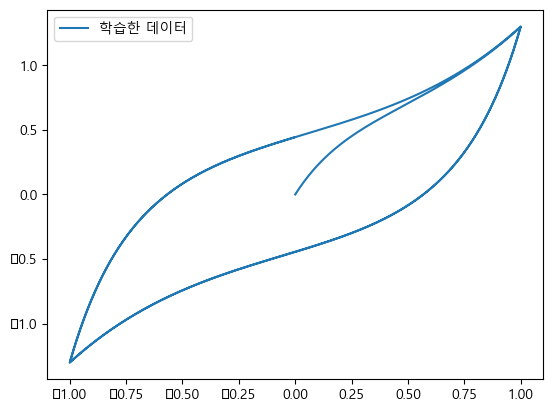

In [191]:
plt.plot(x.iloc[:2000,0], y.iloc[:2000], label = '학습한 데이터')
plt.legend()
plt.show()

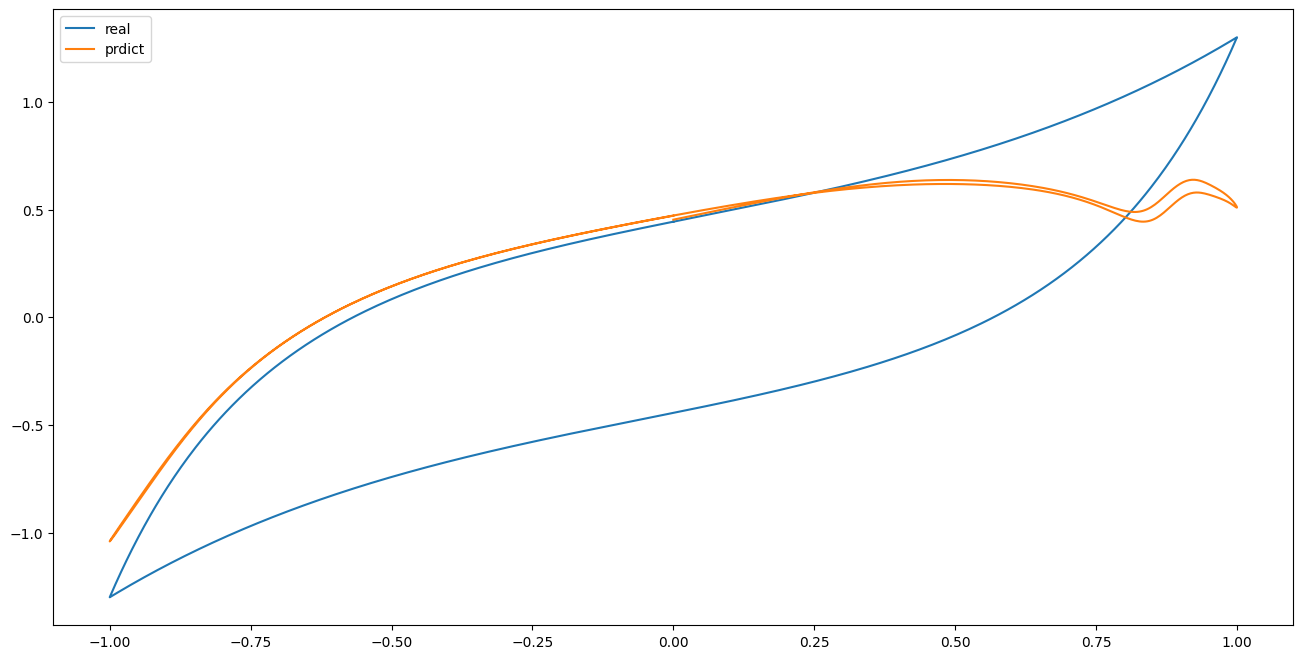

In [185]:
plt.figure(figsize=(16,8))
plt.plot(x.iloc[2000:,0], y.iloc[2000:], label = 'real')
plt.plot(x.iloc[2000:,0], pred, label = 'prdict')
plt.legend()
plt.show()

----
## DNN

In [252]:
model_2 = Sequential()
model_2.add(tf.keras.layers.Dense(32, input_shape=(2,)))
model_2.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model_2.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model_2.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss = 'mse', optimizer = adam)

In [253]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 32)                96        
                                                                 
 dense_59 (Dense)            (None, 64)                2112      
                                                                 
 dense_60 (Dense)            (None, 128)               8320      
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,849
Trainable params: 18,849
Non-trainable params: 0
_________________________________________________________________


In [254]:
dnn = model_2.fit(x_tr, y_tr, epochs=500)

Epoch 1/500
63/63 [==============================] - 0s 629us/step - loss: 1.1021
Epoch 2/500
63/63 [==============================] - 0s 613us/step - loss: 0.6931
Epoch 3/500
63/63 [==============================] - 0s 678us/step - loss: 0.6901
Epoch 4/500
63/63 [==============================] - 0s 790us/step - loss: 0.6858
Epoch 5/500
63/63 [==============================] - 0s 635us/step - loss: 0.6830
Epoch 6/500
63/63 [==============================] - 0s 629us/step - loss: 0.6863
Epoch 7/500
63/63 [==============================] - 0s 613us/step - loss: 0.6888
Epoch 8/500
63/63 [==============================] - 0s 623us/step - loss: 0.6808
Epoch 9/500
63/63 [==============================] - 0s 613us/step - loss: 0.6844
Epoch 10/500
63/63 [==============================] - 0s 611us/step - loss: 0.6823
Epoch 11/500
63/63 [==============================] - 0s 613us/step - loss: 0.6822
Epoch 12/500
63/63 [==============================] - 0s 629us/step - loss: 0.6822
Epoch 13/500


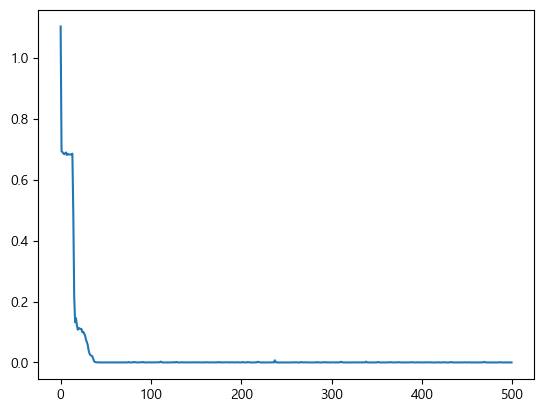

In [255]:
plt.plot(dnn.history['loss'])

In [256]:
pred_2 = model_2.predict(x_te)

32/32 [==============================] - 1s 516us/step


In [257]:
pred_2 = pred_2.reshape(-1,1)

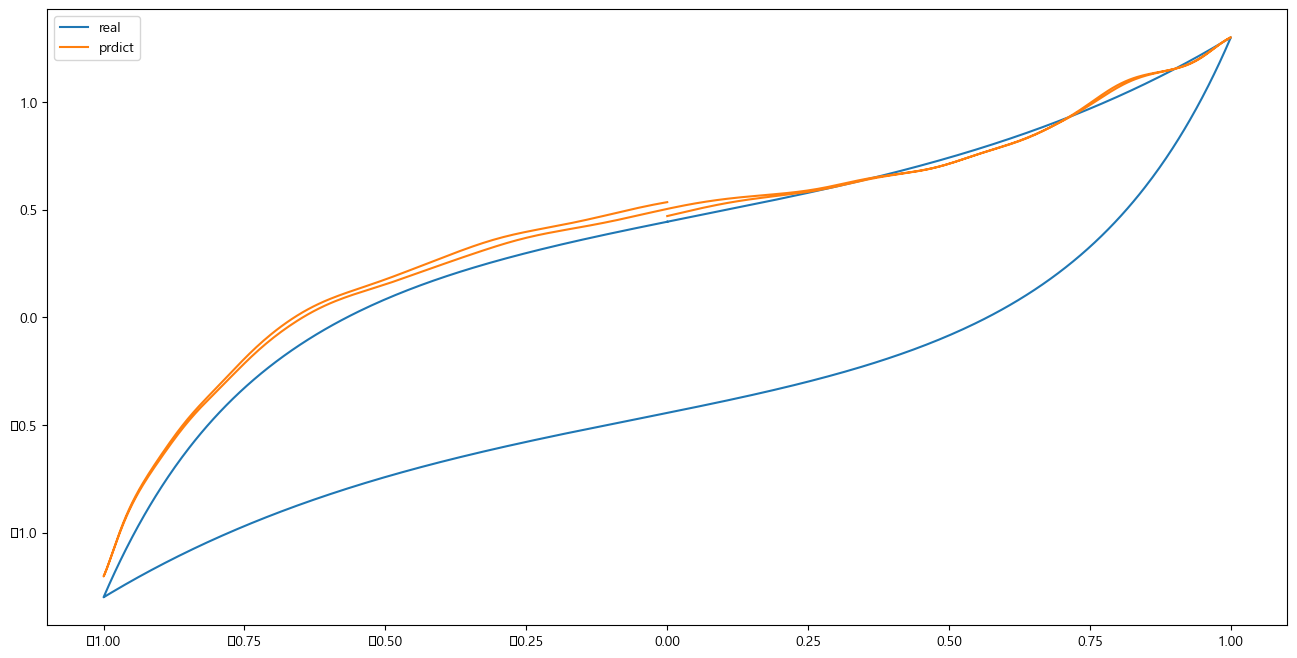

In [258]:
plt.figure(figsize=(16,8))
plt.plot(x.iloc[2000:,0], y.iloc[2000:], label = 'real')
plt.plot(x.iloc[2000:,0], pred_2, label = 'prdict')
plt.legend()
plt.show()

---
## PINN

In [41]:
x0, y0 = 0, 0
w = 0.5
mu = 0.1

In [40]:
from scipy.integrate import odeint
from math import *

In [42]:
-2*beta*u[i] + np.exp(beta*u[i]) - np.exp(-beta*u[i]) + kb*u[i] - np.sign(v[i])*((ka-kb)/alfa)*(np.exp(-alfa*(np.sign(v[i])*(u[i]-uj)+2*u0))-np.exp(-2*alfa*u0)) + np.sign(v[i])*f0

0.4439361230004127

In [261]:
def xt(x, t):
    return -2*beta*x[1] + np.exp(beta*x[1]) - np.exp(-beta*x[1]) + kb*x[1] - np.sign(v[i])*((ka-kb)/alfa)*(np.exp(-alfa*(np.sign(v[i])*(x[1]-uj)+2*u0))-np.exp(-2*alfa*u0)) + np.sign(v[i])*f0

In [263]:
xt([1,2,3,4,5],1)

4.703720540394448

In [289]:
odeint(xt, 0.1, args=[1,2])

TypeError: odeint() missing 1 required positional argument: 't'

In [287]:
tf.gradients(xt, [0, 1])

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.